In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [21]:
global NumSpecies,mu,lambdaa,gamma,D,eta,kappa

In [22]:
def GetPositive(input):
    temp=[]
    for i in input:
        if i>0:
            temp.append(i)
    return temp

In [23]:
def MultiSpecies(t,y):
    global NumSpecies,mu,gamma,D
    dydt=np.zeros(NumSpecies)
    for i in range(NumSpecies):
            sumy=0
            for j in range(NumSpecies):
                sumy=sumy+y[j]
            dydt[i]=mu[i]*y[i]*(1-(gamma*sumy-gamma*y[i]+y[i]))-D*y[i]
    return dydt

In [24]:
def MultiSpeciesHGT(t,y):
    global NumSpecies,mu,lambdaa,gamma,D,eta,kappa
    dydt=np.zeros(NumSpecies*(1+NumSpecies))
    for i in range(NumSpecies):
        ss=1
        sumy=0
        for j in range(NumSpecies):
            if i!=j:
                ss=ss*(1+lambdaa[j]*y[NumSpecies+i*NumSpecies+j]/y[i])
            sumy=sumy+y[j]
        dydt[i]=mu[i]*y[i]*ss*(1-(gamma*sumy-gamma*y[i]+y[i]))-D*y[i]
        for j in range(NumSpecies):
                if j==i:
                    dydt[NumSpecies+i*NumSpecies+j]=dydt[i]
                else:
                    ss=1
                    for k in range(NumSpecies):
                        if k!=i and k!=j:
                            ss=ss*(1+lambdaa[k]*y[NumSpecies+i*NumSpecies+k]/y[i])
                    donor=0
                    for k in range(NumSpecies):
                        donor=donor+y[NumSpecies+k*NumSpecies+j]
                    dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*ss*(1+lambdaa[j])*(1-(gamma*sumy-gamma*y[i]+y[i]))+eta*(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]
    return dydt

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


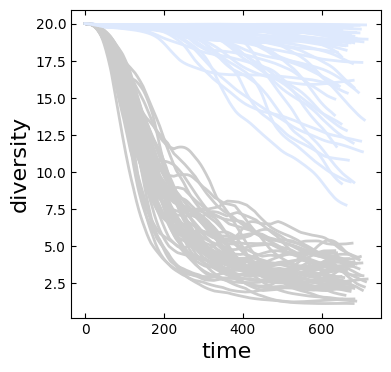

In [25]:
plt.figure(figsize=(4,4))
for repeat in range(50):
    print(repeat)
    NumSpecies=20
    mu0=0.5
    mu=mu0*np.ones(NumSpecies)
    D=0.2
    gamma=0.9
    eta=0.2
    kappa=0.005
    initialHGT=np.zeros(NumSpecies**2+NumSpecies)
    for i in range(NumSpecies):
        initialHGT[i]=1/NumSpecies
        initialHGT[NumSpecies+i*NumSpecies+i]=initialHGT[i]
    
    initial=np.zeros(NumSpecies)
    for i in range(NumSpecies):
        initial[i]=1/NumSpecies
    
    cycles=30
    durations=15+15*np.random.rand(cycles)
    time=[]
    Abund=[]
    AbundHGT=[]
    for i in range(cycles):
        mu=np.multiply(mu,(0.95+0.1*np.random.rand(NumSpecies)))
        lambdaa=np.divide(mu,mu0)-1
        timespan=np.arange(0,durations[i],0.1)
        if i==0:
            time=timespan
        else:
            time=np.concatenate((time,np.add(timespan,max(time))))
        sol=solve_ivp(MultiSpecies,[0,max(timespan)],initial,method='RK45',t_eval = timespan)
        y1=sol.y
        if i==0:
            Abund=y1[range(NumSpecies),:]
        else:
            Abund=np.concatenate((Abund,y1[range(NumSpecies),:]),axis=1)

        initial=y1[range(NumSpecies),-1]

        sol=solve_ivp(MultiSpeciesHGT,[0,max(timespan)],initialHGT,method='RK45',t_eval = timespan)
        y2=sol.y
        if i==0:
            AbundHGT=y2[range(NumSpecies),:]
        else:
            AbundHGT=np.concatenate((AbundHGT,y2[range(NumSpecies),:]),axis=1)
            
        initialHGT=y2[range(NumSpecies**2+NumSpecies),-1]
    
    data=Abund
    diversity=np.zeros(np.size(data,1))
    for i in range(np.size(data,1)):
        temp=data[:,i]
        temp=GetPositive(temp)
        temp=np.divide(temp,sum(temp))
        diversity[i]=np.exp(-sum(np.multiply(temp,np.log(temp))))
    plt.plot(time,diversity,'-',linewidth=2,color=np.multiply([1,1,1],0.8))
    
    data=AbundHGT
    diversity=np.zeros(np.size(data,1))
    for i in range(np.size(data,1)):
        temp=data[:,i]
        temp=GetPositive(temp)
        temp=np.divide(temp,sum(temp))
        diversity[i]=np.exp(-sum(np.multiply(temp,np.log(temp))))
    plt.plot(time,diversity,'-',linewidth=2,color=np.divide([223,234,254],256))
plt.xlabel('time',fontsize=16)
plt.ylabel('diversity',fontsize=16)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('Perturbations.pdf')
plt.show()